# Arctic Lake Bathymetry
#### Exploratory Data Analysis - Depth to other variables
#### Melanie Frost
#### 4/18/2023

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt 

import seaborn as sns

In [2]:
df = pd.read_csv('data/lakes_clean.csv')
df.head()
#df.size

,cycle,id,size,type,cloud_flag,bkgrd_flag,shallow_flag,wind_flag,rgt,seg_lat,...,qual2,qual3,orientation,beg_lat,beg_lon,end_lat,end_lon,sc_orient,quality_metric,beam_strength
0,4,2546,4,1,0,1.0,0,1,266,67.520551,...,0,0,NaN,67.519020,-148.468245,67.519020,-148.468773,0.0,1.000000,Strong
1,4,2546,4,1,0,1.0,0,1,266,67.520859,...,2,0,NaN,67.520765,-148.468775,67.520765,-148.468833,0.0,0.971698,Strong
2,4,2546,4,1,0,1.0,0,1,266,67.521048,...,2,0,NaN,67.520953,-148.468833,67.520953,-148.468889,0.0,0.981132,Strong
3,4,2546,4,1,0,1.0,0,1,266,67.521236,...,5,0,NaN,67.521142,-148.468891,67.521142,-148.468950,0.0,0.954128,Strong
4,4,2546,4,1,0,1.0,0,1,266,67.521432,...,3,0,NaN,67.521337,-148.468950,67.521337,-148.469007,0.0,0.953271,Strong


In [3]:
df = df.drop(['orientation'], axis=1)
df.columns

Index(['cycle', 'id', 'size', 'type', 'cloud_flag', 'bkgrd_flag',
       'shallow_flag', 'wind_flag', 'rgt', 'seg_lat', 'seg_lon',
       'snow_ice_flag', 'wave_flag', 'depth', 'anomalies', 'beam',
       'start_date', 'qual0', 'qual1', 'qual2', 'qual3', 'beg_lat', 'beg_lon',
       'end_lat', 'end_lon', 'sc_orient', 'quality_metric', 'beam_strength'],
      dtype='object')

Text(0.5, 1.0, 'Depth in m')

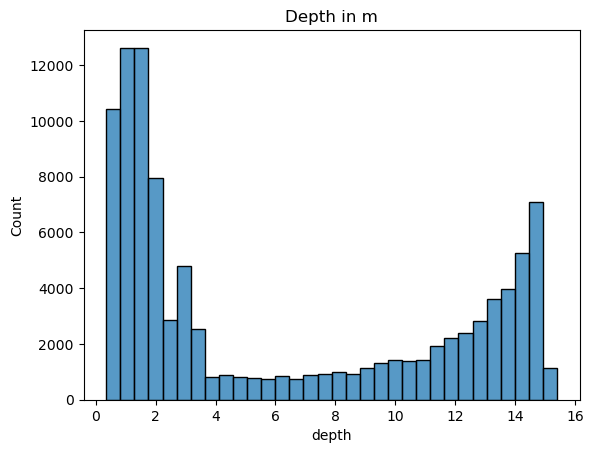

In [4]:
sns.histplot(x='depth', data=df).set_title('Depth in m')

cycle
4     3.385896
8     3.116435
12    3.120039
16    3.096064
Name: depth, dtype: float64


Text(0.5, 1.0, 'Depth in m')

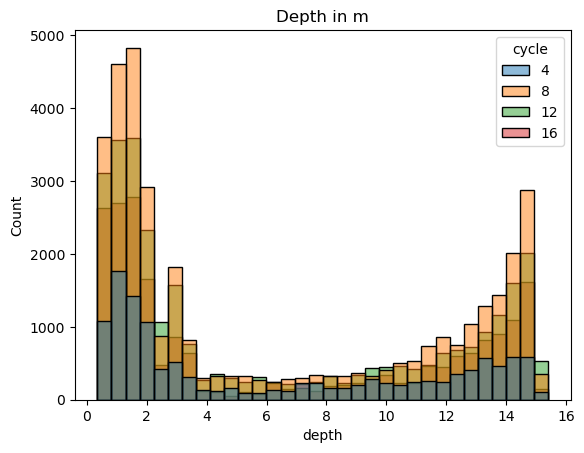

In [5]:
#cycle
print(df.groupby(['cycle'])['depth'].median())
sns.histplot(x='depth', data=df, hue = 'cycle', palette = 'tab10').set_title('Depth in m')

Text(0.5, 1.0, 'Median Depth vs number of observations of lake')

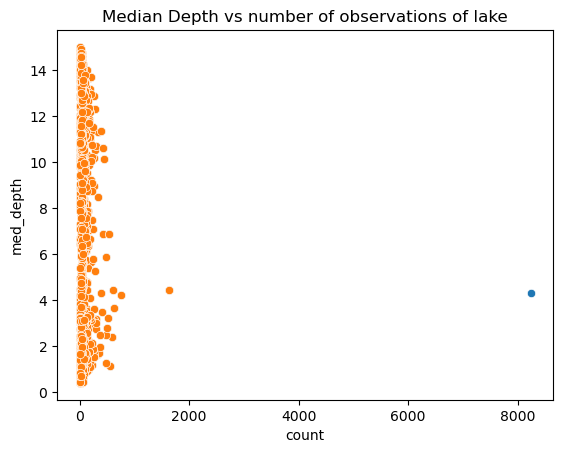

In [7]:
#water body id
#print(df['id'].value_counts())
#4009051 is coastal areas
#193 is Teshekpuk lake
df_id = df.groupby(['id']).agg(
    count = ('id', np.size),
    med_depth = ('depth', np.median),
    ave_depth = ('depth', np.mean))
#print(df_id)
## With Teshekpuk
sns.scatterplot(x='count', y = 'med_depth', data=df_id).set_title('Median Depth vs number of observations of lake')
df_id2 = df_id.drop(193.0)

## Without Teshekpuk
sns.scatterplot(x='count', y = 'med_depth', data=df_id2).set_title('Median Depth vs number of observations of lake')

size
3    4.333066
4    4.123876
5    3.104055
6    3.046049
Name: depth, dtype: float64


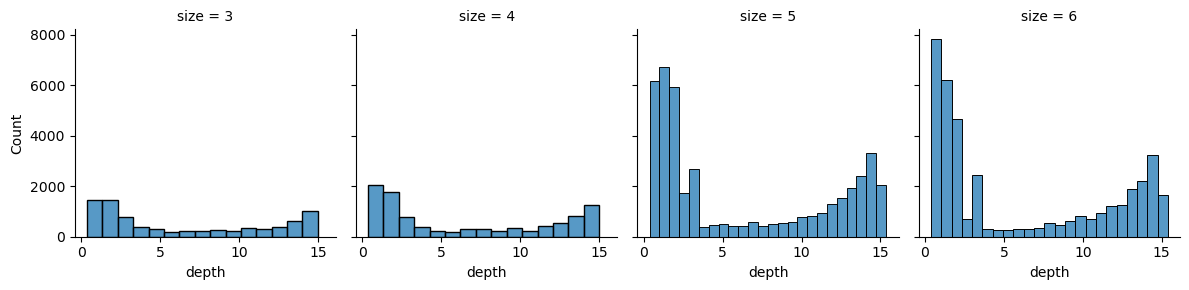

In [8]:
#Size Size of Inland Water Body, where 
#1=Area>10,000 km2, 2=10,000>A≥1,000
#3=1,000>A≥100, 4=100>A≥10
#5=10>A≥1, 6=1>A≥0.1, 7=0.01>A, 

#print(df['size'].value_counts())
#sns.countplot(x='size', data=df)

print(df.groupby(['size'])['depth'].median())
#sns.histplot(x='depth', data=df, hue = 'size', palette = 'tab10').set_title('Depth in m')

g = sns.FacetGrid(df, col="size")
g.map(sns.histplot, "depth")

bkgrd_flag
0.0     3.213770
1.0     2.757718
2.0     3.603813
3.0     9.088426
4.0    10.755930
Name: depth, dtype: float64


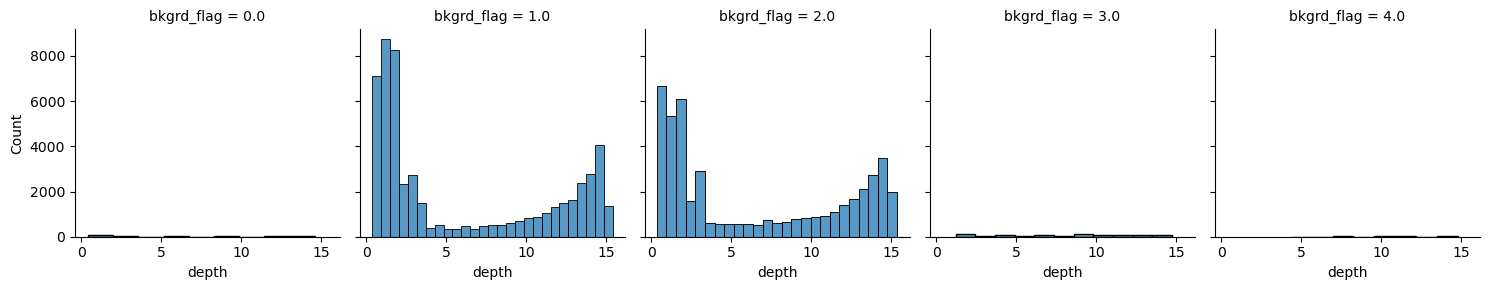

In [9]:
#background flag, describes the degree of background photons present
#in each short segment. 0 <= 0.001, 1: <= 0.01, 2: <=0.05, 3: <=0.1, 4: < = 0.3, 5: < = 0.5,  6: >0.5
#assume 2147483647 is n/a


print(df.groupby(['bkgrd_flag'])['depth'].median())

g = sns.FacetGrid(df, col="bkgrd_flag")
g.map(sns.histplot, "depth")

shallow_flag
-2    12.903004
-1     9.327742
 0     3.086455
 4    11.561937
Name: depth, dtype: float64


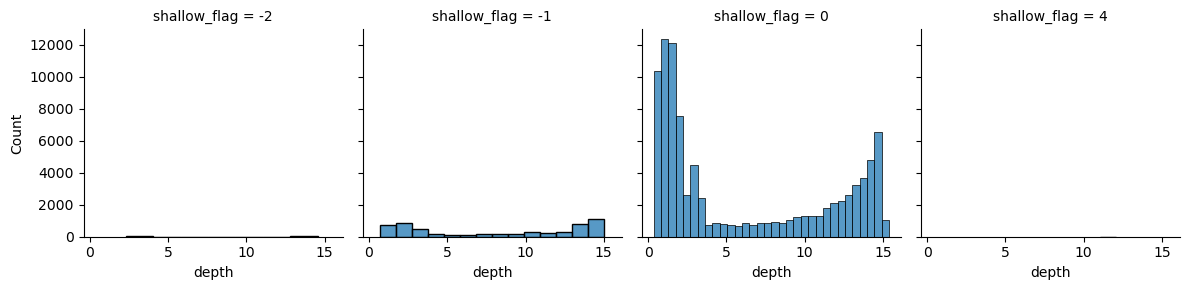

In [12]:
#shallow flag

print(df.groupby(['shallow_flag'])['depth'].median())

g = sns.FacetGrid(df, col="shallow_flag")
g.map(sns.histplot, "depth")

wind_flag
-2     3.367004
-1    10.926676
 0     3.035917
 1     3.124509
 2    10.189508
Name: depth, dtype: float64


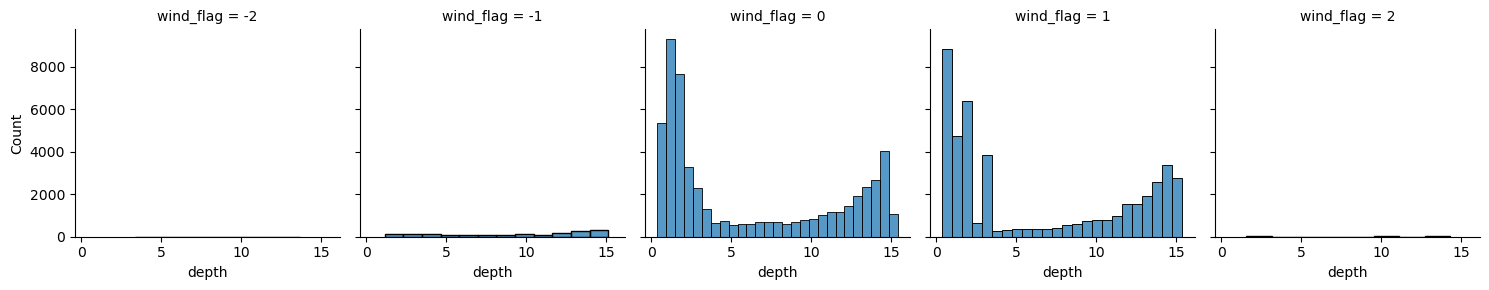

In [13]:
#wind flag
print(df.groupby(['wind_flag'])['depth'].median())

g = sns.FacetGrid(df, col="wind_flag")
g.map(sns.histplot, "depth")

In [14]:
#df.columns

snow_ice_flag
0    8.267329
1    3.100883
Name: depth, dtype: float64


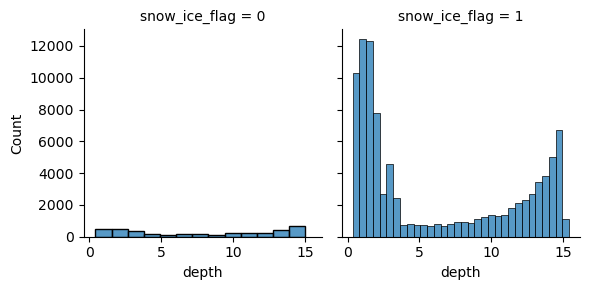

In [15]:
#snow/ice flag, NOAA snow/ice flag scaled by ATL09 
#(0=ice-free water, 1=snow-free land, 2=snow, 3=ice) 

print(df.groupby(['snow_ice_flag'])['depth'].median())

g = sns.FacetGrid(df, col="snow_ice_flag")
g.map(sns.histplot, "depth")

Text(0.5, 1.0, 'Depth vs Std Deviation of surface height (waves)')

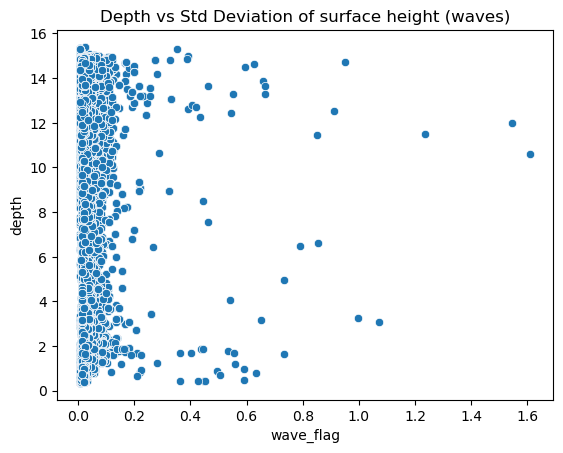

In [16]:
#wave, stdev_water_surf
sns.scatterplot(x='wave_flag', y = 'depth', data=df).set_title('Depth vs Std Deviation of surface height (waves)')


<AxesSubplot: xlabel='start_date', ylabel='med_depth'>

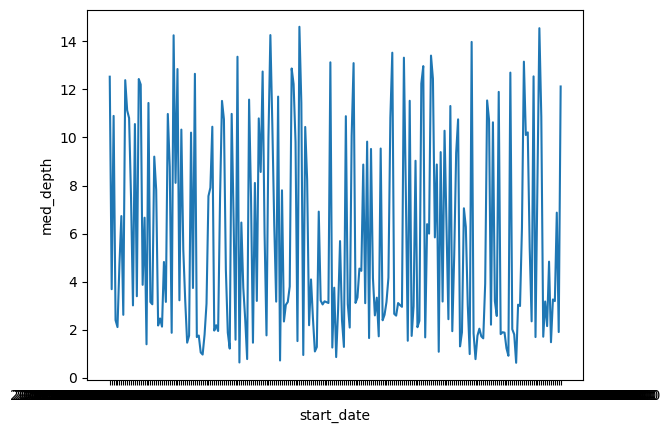

In [17]:
#dates
#sns.scatterplot(x='start_date', y = 'depth', data=df).set_title('Depth vs Std Deviation of surface height (waves)')

date_df = df.groupby(['start_date']).agg(
    med_depth = ('depth', np.median))
sns.lineplot(data = date_df, x = 'start_date', y = 'med_depth')

beam_strength
Strong    5.310653
Weak      3.115057
Name: depth, dtype: float64


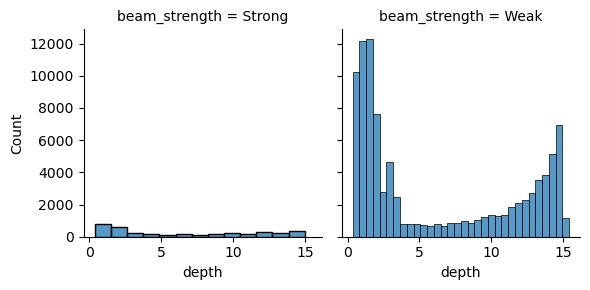

In [19]:
#beam_strength
print(df.groupby(['beam_strength'])['depth'].median())

g = sns.FacetGrid(df, col="beam_strength")
g.map(sns.histplot, "depth")

beam
gt1l    3.049241
gt1r    3.128403
gt2l    4.279335
gt2r    3.340040
gt3l    3.109878
gt3r    2.729707
Name: depth, dtype: float64


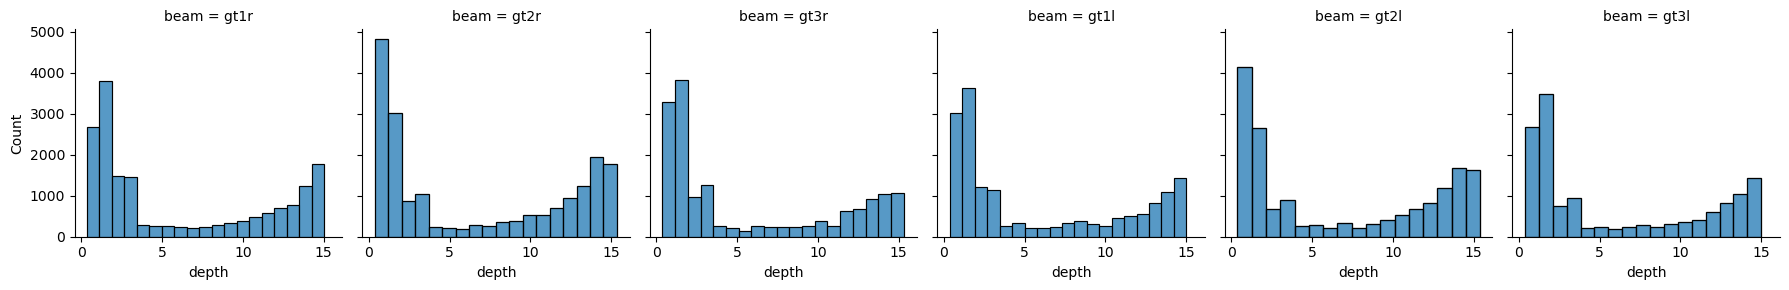

In [20]:
#beam
print(df.groupby(['beam'])['depth'].median())

g = sns.FacetGrid(df, col="beam")
g.map(sns.histplot, "depth")

Text(0.5, 1.0, 'Depth vs Quality Metric')

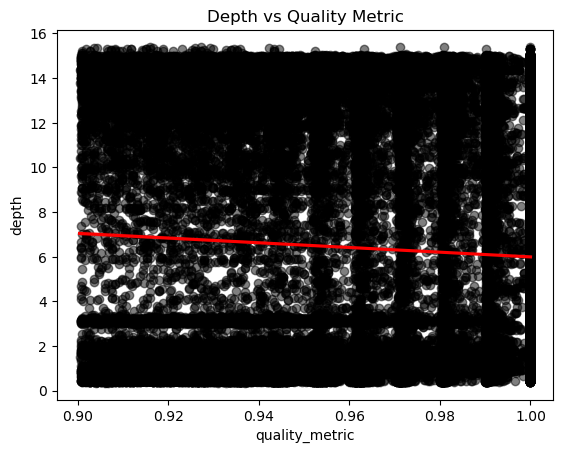

In [22]:
#Quality metric

sns.regplot(x='quality_metric', y = 'depth', data=df,
           scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"}).set_title('Depth vs Quality Metric')

Text(0.5, 1.0, 'Depth vs latitude')

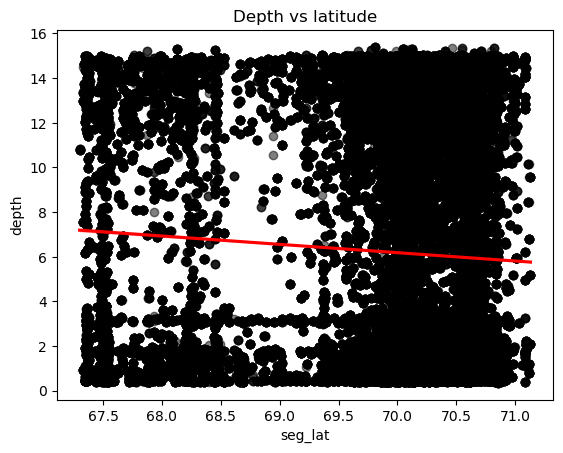

In [24]:
#Lat, segment
sns.regplot(x='seg_lat', y = 'depth', data=df,
           scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"}).set_title('Depth vs latitude')

Text(0.5, 1.0, 'Depth vs latitude')

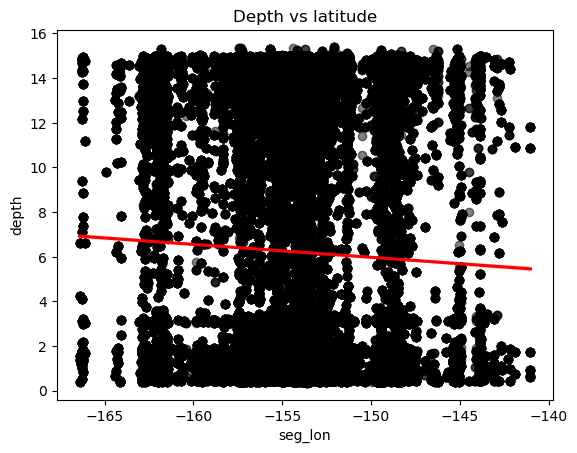

In [25]:
#Lon, segment
sns.regplot(x='seg_lon', y = 'depth', data=df,
           scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"}).set_title('Depth vs latitude')

In [27]:
#Depths vs HydroLakes average lake depth (or other depth metrics) future thought
# g = sns.regplot(x='Depth_avg', y = 'depth', data=df,
#            scatter_kws = {"color": "black", "alpha": 0.5},
#             line_kws = {"color": "red"})
# g.set(xlabel ="ICESat Depth (m)", 
#         ylabel = "HydroLAKES Average Lake Depth (m)", 
#         title ='ICESat Depth vs HydroLAKES Depth average')